In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Dans le notebook suivant, nous allons illustrer de façon empirique le [théorème central limite](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_central_limite). Ce théorème jour un rôle fondamental en statistique, et nous y ferons appel pour justifier la forme des termes d'erreurs lors de la régression. Il permet de contrôler le comportement d'une somme de variables aléatoires indépendantes et identiquement distribuées lorsque le nombre de tirage est suffisant.

Quelque soit la distribution initiale à partir de laquelle on échantillonne, la moyenne de l'échantillon sera distribuée suivant une loi normale, avec un écart type qui se réduit en $1/\sqrt N $.

Si on définit la variable centrée et réduite:
\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 
Alors, pour N suffisamment grand 
$z \rightarrow N(0,1)$

Nous allons générer une liste de nombre dont nous connaissons parfaitement les propriétés telles que la moyenne ou l'écart-type. 

In [59]:
x = np.random.uniform(100,200, size=10000)
print('shape x : ', x.shape)
print('10 first elements of x : \n', x[:10])

shape x :  (10000,)
10 first elements of x : 
 [129.98604758 134.75299507 116.6528275  154.91539728 178.90325729
 164.44199429 164.92734863 152.49359329 115.15358998 173.96541462]


In [60]:
print("true mean is", x.mean())

true mean is 149.97287719078236


Si on prend 1, puis 2, puis k éléments, alors la moyenne calculée se baladera autour de 49.5, en suivant une loi normale caractérisée par l'écart-type $1/\sqrt k$ 

Nous allons échantillonner plusieurs fois une liste de taille k < 100, et allons voir comment se comportent la moyenne. Compléter la fonction ci-dessous qui prend en entrée un vecteur et qui retourne un vecteur de taille inférieure ou égale.

In [61]:
def sample_index(x, size):
    """sample random elements and return array index with length defined by size
    
        Args:
            x (numpy.array) : vector to sample from
        Returns:
            numpy.array with length defined by size
    """
    if size > len(x): size = len(x)
    index = np.arange(x.size)
    np.random.shuffle(index)
    return index[:size]

Nous allons prendre plusieurs échantillons de taille << 100 et calculer la moyenne.

In [62]:
for i in range(10):
    print(x[sample_index(x, 10)].mean())

160.16577652791196
136.80233557515365
146.65559275548085
151.85538317557067
138.248159898213
167.63259192461763
150.67993211159722
145.17325206244385
144.03875005565592
145.45609979904373


Construire une liste qui sauvegarde plusieurs valeurs de la moyenne, et construire l'histogramme de ces valeurs. 

In [63]:
sample_index(x, 20)

array([2358, 7170, 5875, 1518, 6574,  372, 3801, 3248, 4736, 8499, 6878,
       6705, 6320, 8412, 5163, 4782, 8856, 4046, 7257, 5760])

In [64]:
N_iterations = 500
sampled = np.array([x[sample_index(x, 20)].mean() for i in range(N_iterations)])
print(sampled[:10])

[150.61436958 161.00866934 148.5746147  138.42267494 160.97109537
 151.89933293 152.60825168 151.75542043 154.18171678 148.47274146]


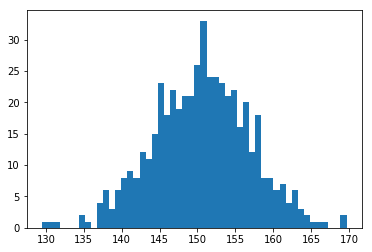

In [65]:
plt.hist(sampled, bins = 50)
plt.show()

Construire la variable réduire $z$

In [66]:
z = (sampled-sampled.mean())/sampled.std()

Construire la densité gaussienne de moyenne 0 et d'écart-type 1 entre -4 et 4, la représenter grpahiquement et superposer l'histogramme de $z$

In [67]:
import scipy.stats as stats
nx = np.linspace(-4, 4, 100)
normal = stats.norm.pdf(nx)

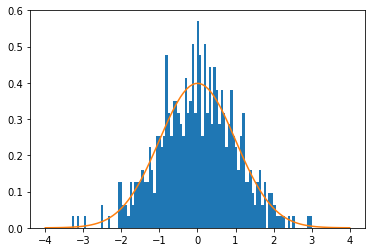

In [68]:
plt.hist(z, bins=100, normed=True)
plt.plot(nx, normal)
plt.show()